# 4.10 Coding Etiquette & Excel Reporting
## -Consolidate results of Python analysis in a final report for stakeholders
## -Prepare a population flow to demonstrate process of data cleaning
### -Address Security issues, remove PII
### -Create flags: region, exclusion flag for low-activity customers
### -import department dataset, transpose, and merge into dataset for better visualizations (to see departments without having to use data dictionary), then export as 'instacart_highspender_dep_merge'
### -create more flags: 'age_flag', 'living_flag', 'shop_time_flag', 'dep_popularity', 'mean_orders'
### -export as 'instacart_merged_flagged' after flags added
## CREATE VISUALIZATIONS
#### - bar chart for spending habits per regions
#### - bar chart for department and product popularity
#### - histogram of product and prices
#### - bar chart of top 10 products
#### - pie chart for age groups
#### - pie chart for living situation (alone vs. with family)
#### - stacked bar chart of loyalty by age group & type of spenders by loyalty and age group
#### - bar graph and pie chart for shopping time behaviors (early bird, night owl, regular)
#### - line graph for shop times in relationship to departments
#### - bar charts and stacked bar chart for top departments per regions
## Aggregations for max, mean, and min variables on a customer-profile level for usage frequency and expenditure
## Export as 'instacart_merged_2.pkl'


# Part 1:

##  #1) Import libraries and newest, merged dataset

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# insert path
path = r'/Users/nancykray/Desktop/Instacart Basket Analysis'

In [ ]:
# insert newest dataset
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customers_orders_products_merged.pkl'))

In [ ]:
#check head to see if the new customers column is there
instacart.head()

#### 'first_order' column shows new customers by 'first_order', otherwise marked as 'repeat customers'

# #2) Address security issues, remove PII Data

In [ ]:
#remove customer 'first_name' and 'surname' columns
#instacart.drop(columns=['first_name', 'surname'])

#### output has been removed to save space after check (noted below)

In [ ]:
# looks good, now permanently drop from dataset since this only visually removed it
# then, remove ouput from above cell to save space
instacart=instacart.drop(columns=['first_name', 'surname'])

In [ ]:
#check the head to see if columns are gone
instacart.head()

## #3) The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. 
### use https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States to determine regions


In [ ]:
# Define a function to segment states into regions using 'if' statements

def region_label (row):
    if row ['state'] in ('Maine','New Hampshire','Vermont','Massachusetts','Rhode Island', 'Connecticut','New York','Pennsylvania','New Jersey'):
       return 'Northeast'
    elif row ['state'] in ('Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri'):
       return 'Midwest'
    elif row ['state'] in ('Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee', 'Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana'):
        return 'South'
    elif row ['state'] in ('Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii'):
        return 'West'
    else: return 'na'

In [ ]:
# Create new column
instacart['region'] = instacart.apply(region_label, axis=1)

In [ ]:
#Check the head to see if column 'region' is there
instacart.head()

## 3b) Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [ ]:
# check data values
instacart['region'].value_counts()

In [ ]:
# check the length
len(instacart)

In [ ]:
# create a crosstab
crosstab = pd.crosstab(instacart['spending_flag'],instacart['region'], dropna = False)

In [ ]:
# check the crosstab
crosstab

In [ ]:
# Save it on excel (titled '4.10.1 crosstab_region_spending.xlsx')
crosstab.to_clipboard()

## #4) The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [ ]:
#create a 'low_activity' column
instacart.loc[instacart['max_order'] < 5, 'low_activity'] = 'True'

In [ ]:
instacart.loc[instacart['max_order'] >= 5, 'low_activity'] = 'False'

In [ ]:
instacart['low_activity'].value_counts()

In [ ]:
# check the new 'low_activity' column in dataset
instacart.head()

In [ ]:
# Create sample/table including only mid to high_activity customers
mid_high_spender = instacart[instacart['low_activity'] == 'False']

In [ ]:
# check to see the length and compare with False in table above
len(mid_high_spender)

#### It matches so the sample has been performed correctly.  Now we have to export it.

In [ ]:
# Export the sample
mid_high_spender.to_pickle(os.path.join(path, '02 Data','Prepared Data','mid_high_spender.pkl'))

## #5) The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [ ]:
instacart.columns

#### I want to bring in the department dataframe and merge it with my sample data set 'mid_high_spender' mid_high_spenderin order to best look at these observations

In [ ]:
#look at the department_id column of current dataset 'instagram'
instacart['department_id'].head(10)

noting the data type here and will double check with departments dataset when merging to avoid mixed data

In [ ]:
# import department_wrangled.csv dataframe
dep=pd.read_csv(os.path.join( path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [ ]:
dep.head()

In [ ]:
# here, I became stumped because I could not understand why my headings were not how lesson 4.4 showed.
# maybe they were exported incorrectly, so I decided to follow the prompts from the example

so instead, I will import the original departments.csv dataset and manipulate it again to get it transposed to fit the instacart sample dataset that I named 'mid_high_spender'

In [ ]:
# Import the departments.csv data set to include to the current 'instacart' dataframe
dep = pd.read_csv(os.path.join( path, '02 Data', 'Original Data', 'departments.csv'))

In [ ]:
#check the head
dep.head()

In [ ]:
#transpose this to fit prior to merging
dep_t = dep.T

In [ ]:
#check head
dep_t

In [ ]:
#fix the heading
dep_t.reset_index(inplace=True)

In [ ]:
#check head
dep_t.head()

In [ ]:
dep_t.columns = dep_t.iloc[0]

In [ ]:
# check transposed version of the entire dataset now
dep_t

In [ ]:
#check datatypes of the key column now to make sure they match prior to merging dep_t and mid_high_spender
dep_t.dtypes

In [ ]:
#now check 'mid_high_spender' department_id column datatype
mid_high_spender['department_id'].dtypes

In [ ]:
dep_t['department_id'] = dep_t['department_id'].astype(str)
                                                    

In [ ]:
dep_t['department_id'].dtypes

In [ ]:
mid_high_spender['department_id'].dtypes

now both department_id columns have the same datype.  I can now merge them

In [ ]:
# Combining data
df_merged = mid_high_spender.merge(dep_t, on='department_id')

In [ ]:
df_merged.head()

### note: with this merge, it would not allow me to use 'indicator=true' to check for a full match.  I see, however that I did return a _merge column so I think it is ok to proceed

In [ ]:
#double check
# Checking the result
df_merged['_merge'].value_counts()

In [ ]:
#drop the merge column to avoid confusion later on (should I want to merge this dataset)
df_merged = df_merged.drop(columns =['_merge'])

In [ ]:
#check the values for 'departmnt' column
df_merged['department'].value_counts()

### EXPORT this new  dataframe as 'instacart_highspender_dep_merge'

In [ ]:
# Exporting the data
df_merged.to_pickle(os.path.join( path, '02 Data', 'Prepared Data', 'instacart_highspender_dep_merge.pkl'))

## Customer profiling from #5

In [ ]:
# Import the new dataset
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_highspender_dep_merge.pkl'))

In [ ]:
#check head
df_merged.head()

### Now I will create some FLAG columns to manipulate the data to find trends

## age_flag

In [ ]:
# create flag for young (< 30)
df_merged.loc[df_merged['age'] < 30, 'age_flag']= 'Below_30'

In [ ]:
#create flag for 30-40s
df_merged.loc[(df_merged['age'] >= 30) & (df_merged['age'] < 50), 'age_flag']= '30s & 40s'

In [ ]:
#create flag for middle age before retrirement (50-64)
df_merged.loc[(df_merged['age'] >=50) &(df_merged['age'] < 65), 'age_flag']= 'Middle Age'

In [ ]:
#create flag for retired/Older Adult population
df_merged.loc[df_merged['age'] >= 65, 'age_flag']= 'Older Adult'

In [ ]:
#check values in these age flags
df_merged['age_flag'].value_counts(dropna=False)

In [ ]:
#check the stats
df_merged['age_flag'].describe()

In [ ]:
#check head
df_merged.head()

## living_flag

In [ ]:
# check info in 'dependants' column 
df_merged['dependants'].unique()

In [ ]:
#create flag for those living alone
df_merged.loc[df_merged['dependants'] == 0, 'living_flag']= 'Alone'

In [ ]:
# create flag for those with dependants
df_merged.loc[df_merged['dependants'] > 0, 'living_flag']= 'With Family'

In [ ]:
#check the stats for this flag
df_merged['living_flag'].describe()

In [ ]:
#check head
df_merged.head()

## shop_time_flag

In [ ]:
# create a default flag for Regular shop times
df_merged['shop_time_flag'] = 'Regular'

In [ ]:
# create flag for 'Early Bird' for orders between 5am and 8am
df_merged.loc[df_merged['order_time'].between(5, 8), 'shop_time_flag'] = "Early Bird"

In [ ]:
# create flag for 'Night Owl' for orders after 8pm and before 5am
df_merged.loc[(df_merged['order_time'] >= 20) | (df_merged['order_time'] < 5), 'shop_time_flag'] = 'Night Owl'


In [ ]:
#check the values
df_merged['shop_time_flag'].value_counts(dropna=False)

In [ ]:
#check head to see all 3 new columns 
df_merged.head()

In [ ]:
#let's look at all of our columns and review our prior flagged columns:
df_merged.columns

## *REVIEW previously created flags and insights:
### 'busiest_day' created from 4.7 lesson, telling us that Saturday (0) is the busiest day and Wednesday (4) is the least busy day
### 'busiest_period_of_day' created from lesson 4.4, telling us that 10am is the busiest hour for placing orders 
### 'max_order' created in 4.8, telling us that those in the 'loyalty_flag' column have > 40 orders 
### 'spending flag' created in 4.8 shows high/low/regular spenders
### 'frequency_flag' created in 4.8 shows frequent/regular/non-frequent customers

### 'mean_product_price' created in 4.8 looking at the mean of products and saw that produce sold more than household.  


In [ ]:
df_merged[['department_id', 'product_name','mean_product_price', 'prices']].head(50)

## 'dep_popularity' flag

In [ ]:
#check the means of orders for each department_id (average number of orders per user for each department_id)
df_merged.groupby('department_id').agg({'order_number':['mean']})

### first create a column for 'mean_orders' to be able to figure out the most popular department

In [ ]:
#use the transform() function for creating a 'mean_orders' column for each department_id
df_merged['mean_orders']=df_merged.groupby(['department_id'])['order_number'].transform(np.mean)

In [ ]:
#check the head of columns of interest
df_merged[['mean_orders', 'department_id', 'order_number']].head(10)

In [ ]:
#check the stats in the new column to see how to separate the flag
df_merged['mean_orders'].describe()

In [ ]:
df_merged['mean_orders'].max()

In [ ]:
df_merged['mean_orders'].min()

#### Now I can create the flags for this new column

In [ ]:
#create flag, 'Not Popular' for non-popular department
df_merged.loc[df_merged['mean_orders'] <=18, 'dep_popularity'] = 'Not popular'

In [ ]:
#create flag, 'Regularly bought' regularly popular department
df_merged.loc[(df_merged['mean_orders'] >18.1) & (df_merged['mean_orders'] <=21) , 'dep_popularity'] = 'Regularly bought'

In [ ]:
#create flag, 'Most Popular' for most frequently bought department
df_merged.loc[df_merged['mean_orders']>=21.1, 'dep_popularity'] = 'Most Popular'

In [ ]:
#check head to see the new column
df_merged.head()

## Export the final dataframe as 'instacart_merged_flagged'

In [ ]:
# Exporting the data since all of the flagged columns have been created and ready for visualizations
df_merged.to_pickle(os.path.join( path, '02 Data', 'Prepared Data', 'instacart_merged_flagged.pkl'))

## #6) Create an appropriate visualization to show the distribution of profiles.


In [3]:
#Import the dataset for visualizations
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_merged_flagged.pkl'))

In [4]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,marital_status,income,region,low_activity,department,age_flag,living_flag,shop_time_flag,mean_orders,dep_popularity
0,2539329,1,1,2,8,NaN,First Order,196,1,0,...,married,40423,South,False,beverages,30s & 40s,With Family,Early Bird,17.901479,Not popular
1,2398795,1,2,3,7,15.0,Repeat Customer,196,1,1,...,married,40423,South,False,beverages,30s & 40s,With Family,Early Bird,17.901479,Not popular
2,473747,1,3,3,12,21.0,Repeat Customer,196,1,1,...,married,40423,South,False,beverages,30s & 40s,With Family,Regular,17.901479,Not popular
3,2254736,1,4,4,7,29.0,Repeat Customer,196,1,1,...,married,40423,South,False,beverages,30s & 40s,With Family,Early Bird,17.901479,Not popular
4,431534,1,5,4,15,28.0,Repeat Customer,196,1,1,...,married,40423,South,False,beverages,30s & 40s,With Family,Regular,17.901479,Not popular


### Create visualization for spending habits per regions

In [6]:
df_merged[['spending_flag','region']].head()

,spending_flag,region
0,Low Spender,South
1,Low Spender,South
2,Low Spender,South
3,Low Spender,South
4,Low Spender,South


In [7]:
#import crosstab with spending habits for creating a chart
region_spendings = pd.read_excel(os.path.join(path,'02 Data','Prepared Data', '4.10 crosstabs', '4.10.1 crosstab_region_spending.xlsx'))

In [8]:
region_spendings

,spending_flag,Midwest,Northeast,South,West
0,High Spender,155975,108225,209691,160354
1,Low Spender,7441350,5614511,10582194,8132559


Text(0.5, 1.0, 'Spending Across Regions')

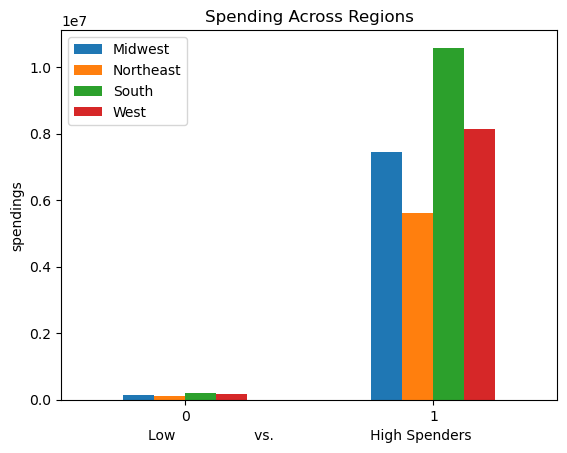

In [9]:
bar = region_spendings.plot.bar(rot=0)
plt.xlabel("Low                  vs.                      High Spenders")
plt.ylabel("spendings")
plt.title("Spending Across Regions")


##### South Regions have the make the most sales across all types of spenders (high spenders and low spenders).  In fact, all regions show the same trends, with South Regions spending the most, followed by West, then Midwest, and last in the Northeast.  

In [10]:
# EXPORT BAR GRAPH 'bar_reg_spendings.png' 
bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_reg_spendings.png'))

## Let's find a visualization for department and product popularity

In [11]:
# review columns
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,marital_status,income,region,low_activity,department,age_flag,living_flag,shop_time_flag,mean_orders,dep_popularity
0,2539329,1,1,2,8,NaN,First Order,196,1,0,...,married,40423,South,False,beverages,30s & 40s,With Family,Early Bird,17.901479,Not popular
1,2398795,1,2,3,7,15.0,Repeat Customer,196,1,1,...,married,40423,South,False,beverages,30s & 40s,With Family,Early Bird,17.901479,Not popular
2,473747,1,3,3,12,21.0,Repeat Customer,196,1,1,...,married,40423,South,False,beverages,30s & 40s,With Family,Regular,17.901479,Not popular
3,2254736,1,4,4,7,29.0,Repeat Customer,196,1,1,...,married,40423,South,False,beverages,30s & 40s,With Family,Early Bird,17.901479,Not popular
4,431534,1,5,4,15,28.0,Repeat Customer,196,1,1,...,married,40423,South,False,beverages,30s & 40s,With Family,Regular,17.901479,Not popular


In [12]:
#let's look at the 'department' and their corresponding 'department_id'
List_Of_Categories_In_Column=list(df_merged[['department_id', 'department']].value_counts().index)

In [13]:
List_Of_Categories_In_Column

[('4', 'produce'),
 ('16', 'dairy eggs'),
 ('19', 'snacks'),
 ('7', 'beverages'),
 ('1', 'frozen'),
 ('13', 'pantry'),
 ('3', 'bakery'),
 ('15', 'canned goods'),
 ('20', 'deli'),
 ('9', 'dry goods pasta'),
 ('17', 'household'),
 ('12', 'meat seafood'),
 ('14', 'breakfast'),
 ('11', 'personal care'),
 ('18', 'babies'),
 ('6', 'international'),
 ('5', 'alcohol'),
 ('8', 'pets'),
 ('21', 'missing'),
 ('2', 'other'),
 ('10', 'bulk')]

In [14]:
df_merged.groupby('department_id').agg({'order_number':['mean']})

,order_number
,mean
department_id,
1,16.160739
10,20.797555
11,16.933392
12,16.576910
13,17.328319
14,17.469987
15,16.933858
16,18.324695


In [15]:
# Take a look at count in each category
df_merged['dep_popularity'].value_counts()

dep_popularity
Not popular         16165087
Regularly bought    14700298
Most Popular           64768
nan                    34411
Name: count, dtype: int64

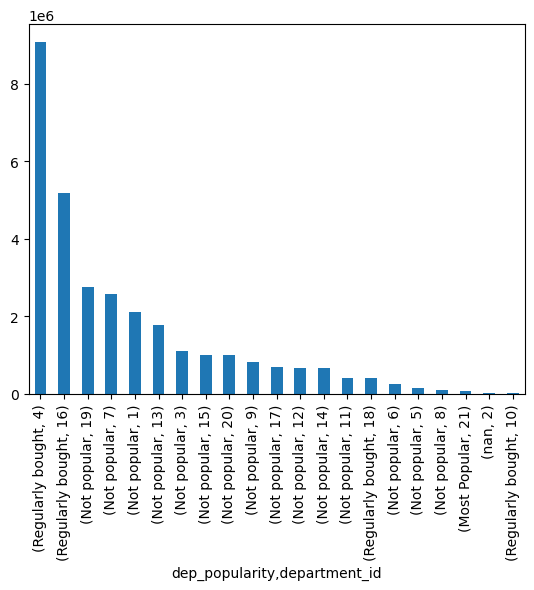

In [16]:
bar=df_merged[['dep_popularity', 'department_id']].value_counts().plot.bar()

##### this bar chart shows the  means (average) of order numbers placed within each department.  I'm not making sense of this chart so I might have done something weird with this flagged column.  I will choose to focus on the mean_orders within the department instead

In [17]:
df_merged[['dep_popularity', 'department']].value_counts()

dep_popularity    department     
Regularly bought  produce            9079273
                  dairy eggs         5177182
Not popular       snacks             2766406
                  beverages          2571901
                  frozen             2121731
                  pantry             1782705
                  bakery             1120828
                  canned goods       1012074
                  deli               1003834
                  dry goods pasta     822136
                  household           699857
                  meat seafood        674781
                  breakfast           670850
                  personal care       424306
Regularly bought  babies              410392
Not popular       international       255991
                  alcohol             144627
                  pets                 93060
Most Popular      missing              64768
nan               other                34411
Regularly bought  bulk                 33451
Name: count, dtype: i

In [18]:
df_merged[['mean_orders', 'department']].value_counts()

mean_orders  department     
18.495730    produce            9079273
18.324695    dairy eggs         5177182
17.830354    snacks             2766406
17.901479    beverages          2571901
16.160739    frozen             2121731
17.328319    pantry             1782705
17.856619    bakery             1120828
16.933858    canned goods       1012074
17.144802    deli               1003834
16.633019    dry goods pasta     822136
16.438914    household           699857
16.576910    meat seafood        674781
17.469987    breakfast           670850
16.933392    personal care       424306
19.867090    babies              410392
17.174694    international       255991
16.034226    alcohol             144627
15.995927    pets                 93060
24.281327    missing              64768
18.096481    other                34411
20.797555    bulk                 33451
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '(produce, 4)'),
  Text(1, 0, '(dairy eggs, 16)'),
  Text(2, 0, '(snacks, 19)'),
  Text(3, 0, '(beverages, 7)'),
  Text(4, 0, '(frozen, 1)'),
  Text(5, 0, '(pantry, 13)'),
  Text(6, 0, '(bakery, 3)'),
  Text(7, 0, '(canned goods, 15)'),
  Text(8, 0, '(deli, 20)'),
  Text(9, 0, '(dry goods pasta, 9)'),
  Text(10, 0, '(household, 17)'),
  Text(11, 0, '(meat seafood, 12)'),
  Text(12, 0, '(breakfast, 14)'),
  Text(13, 0, '(personal care, 11)'),
  Text(14, 0, '(babies, 18)'),
  Text(15, 0, '(international, 6)'),
  Text(16, 0, '(alcohol, 5)'),
  Text(17, 0, '(pets, 8)'),
  Text(18, 0, '(missing, 21)'),
  Text(19, 0, '(other, 2)'),
  Text(20, 0, '(bulk, 10)')])

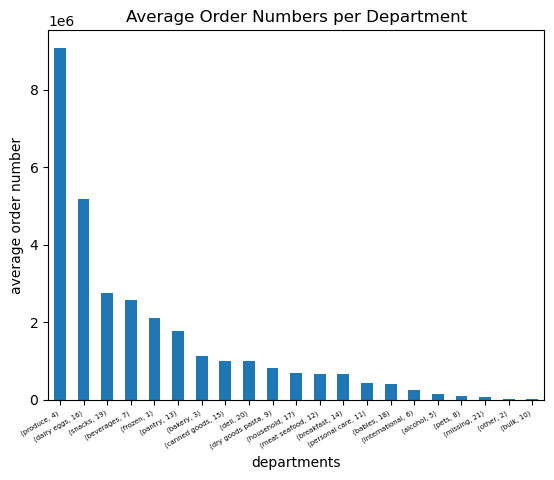

In [19]:
bar2=df_merged[['department', 'department_id']].value_counts().plot.bar()

#add title and labels
plt.xlabel("departments")
plt.ylabel("average order number")
plt.title("Average Order Numbers per Department")

# `ha` is just shorthand for horizontal alignment
plt.xticks(rotation=30, ha='right', fontsize=5)


##### Good, this shows the information I want in a clear format, demonstrating the mean_orders for each department!  Produce, dairy, snacks, beverages, frozen, and pantry departments ranking as the most popular departments.  The least popular departments are international, alcohol, and pets.

### Export this bar chart as 'bar_departments.png'

In [20]:
bar2.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'bar_departments.png'))

## Let's look at product and their prices

In [5]:
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time', 'days_since_prior_order', 'first_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'customer_frequency',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined', 'dependants',
       'marital_status', 'income', 'region', 'low_activity', 'department',
       'age_flag', 'living_flag', 'shop_time_flag', 'mean_orders',
       'dep_popularity'],
      dtype='object')

In [6]:
#check the max price for products
df_merged['prices'].max()

25.0

Text(0.5, 1.0, 'Product Prices')

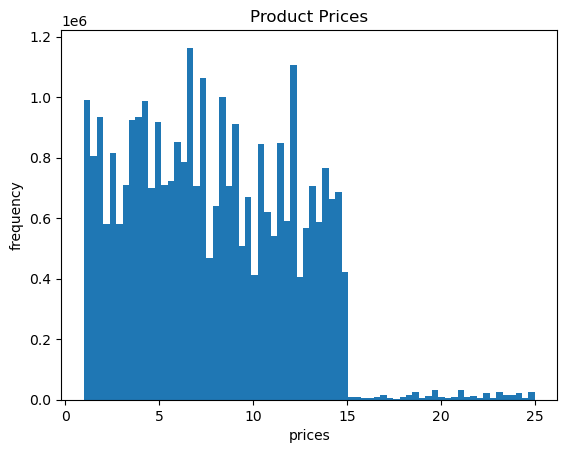

In [23]:
hist_3=df_merged['prices'].plot.hist(bins=70)

#add title and labels
plt.xlabel("prices")
plt.ylabel("frequency")
plt.title("Product Prices")



##### This histogram was recreated from lesson 4.9 so that a title and labels could be added to better understand the chart
### Export this as hist_product_prices

In [24]:
hist_3.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'hist_product_prices.png'))

## Let's look at product popularity to answer the question regarding "what types of products are more popular than others" 
### to do this, look at the top departments: within those, look at the 'max_order' columns witin the 'product_name' column 

In [7]:
df_merged[['product_name', 'order_number']].max()

product_name    with a Splash of Pineapple Coconut Water
order_number                                          99
dtype: object

so 'With a Splash of Pineapple Coconut Water' is the most popular product

### Let's look at each department and find the top product within that department

In [93]:
#let's look at produce within department column to see top products purchased
df_produce=df_merged[df_merged['department']=='produce']

In [95]:
df_produce.describe()

,order_number,orders_day_of_week,order_time,days_since_prior_order,add_to_cart_order,reordered,aisle_id,prices,max_order,mean_product_price,customer_frequency,age,dependants,income,mean_orders
count,9.079273e+06,9.079273e+06,9.079273e+06,8.608701e+06,9.079273e+06,9.079273e+06,9.079273e+06,9.079273e+06,9.079273e+06,9.079273e+06,9.079273e+06,9.079273e+06,9.079273e+06,9.079273e+06,9.079273e+06
mean,1.849573e+01,2.687693e+00,1.341239e+01,1.057412e+01,8.035116e+00,6.666554e-01,6.355122e+01,7.980348e+00,3.536639e+01,1.035381e+01,9.707974e+00,4.947568e+01,1.501984e+00,1.003109e+05,1.849573e+01
std,1.812225e+01,2.114566e+00,4.292170e+00,8.446608e+00,6.668181e+00,4.714085e-01,3.893020e+01,4.031587e+00,2.526740e+01,5.579598e+01,6.526977e+00,1.848096e+01,1.120347e+00,4.088201e+04,3.723674e-09
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.600000e+01,1.000000e+00,5.000000e+00,1.300000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04,1.849573e+01
25%,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.000000e+00,0.000000e+00,2.400000e+01,4.500000e+00,1.500000e+01,7.456667e+00,6.000000e+00,3.400000e+01,0.000000e+00,6.901100e+04,1.849573e+01
50%,1.200000e+01,2.000000e+00,1.300000e+01,7.000000e+00,6.000000e+00,1.000000e+00,8.300000e+01,7.900000e+00,2.900000e+01,7.869531e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.746800e+04,1.849573e+01
75%,2.600000e+01,5.000000e+00,1.600000e+01,1.400000e+01,1.100000e+01,1.000000e+00,8.300000e+01,1.140000e+01,4.900000e+01,8.279400e+00,1.200000e+01,6.500000e+01,3.000000e+00,1.284210e+05,1.849573e+01
max,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,1.390000e+02,1.000000e+00,1.230000e+02,1.500000e+01,9.900000e+01,1.404251e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05,1.849573e+01


In [89]:
# Sorting by quantity ordered and selecting top 10
product_count = df_merged['product_name'].value_counts()
top_10_products = product_count.head(10)

In [92]:
top_10_products

product_name
Banana                    453164
Bag of Organic Bananas    366403
Organic Strawberries      255988
Organic Baby Spinach      231772
Organic Hass Avocado      206799
Organic Avocado           168267
Large Lemon               145397
Strawberries              136330
Limes                     134751
Organic Whole Milk        133514
Name: count, dtype: int64

In [96]:
# Creating a colormap with 10 distinct colors
colors = plt.cm.tab10(np.arange(10))

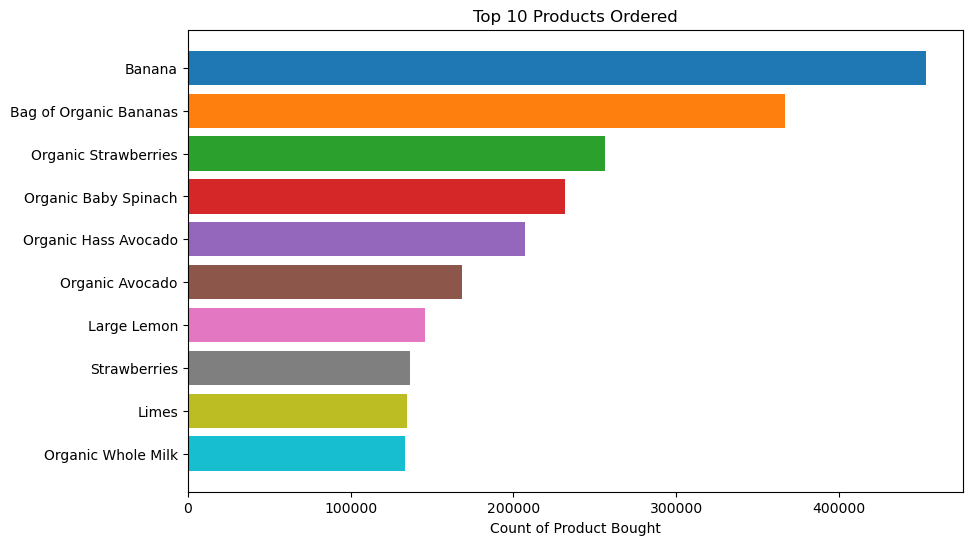

<Figure size 640x480 with 0 Axes>

In [107]:


plt.figure(figsize=(10, 6))
plt.barh(top_10_products.index, top_10_products.values, color=colors)
plt.xlabel('Count of Product Bought')
plt.ylabel('')
plt.title('Top 10 Products Ordered')
plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
plt.show()
# Save Bar Graph
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','top_10_products.png'),bbox_inches='tight')
plt.show()


#### this didn't save correctly so I will take a screen shot to add this bar to my final report

### Let's look at age

In [141]:
# Drop duplicate user_id to consider each user only once
unique_users = df_merged.drop_duplicates(subset='user_id')

In [144]:
age_flag_counts = unique_users['age_flag'].value_counts()

In [145]:
custom_colors = ['blue', 'red', 'orange', 'green']

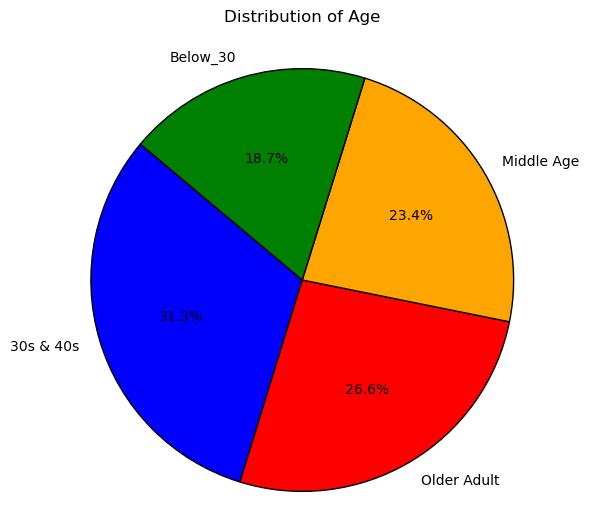

In [148]:
plt.figure(figsize=(6, 6))
plt.pie(age_flag_counts, labels=age_flag_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Age', loc='center', pad=20)
plt.axis('equal')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','age_distribution_pie_chart.png')) #Saving the chart
plt.show()

### Let's look at living situation

In [150]:
living_flag_counts = unique_users['living_flag'].value_counts()

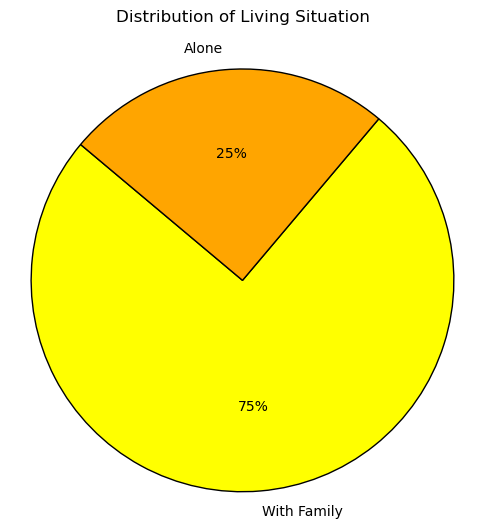

In [154]:
plt.figure(figsize=(6, 6))
plt.pie(living_flag_counts, labels=living_flag_counts.index, autopct='%1.0f%%', startangle=140, colors=['yellow', 'orange'], wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Living Situation',loc='center', pad=20)
plt.axis('equal')
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','living_distribution_pie.png'),bbox_inches='tight') #Saving the chart
plt.show()

In [157]:
crosstab_loyal = pd.crosstab(unique_users['age_flag'],unique_users['loyalty_flag'], dropna = False)

In [158]:
crosstab_loyal

loyalty_flag,Loyal Customer,New Customer,Regular Customer
age_flag,,,
30s & 40s,5331,21544,24106
Below_30,3135,12852,14389
Middle Age,4000,16162,17862
Older Adult,4551,18192,20507


<Figure size 800x1000 with 0 Axes>

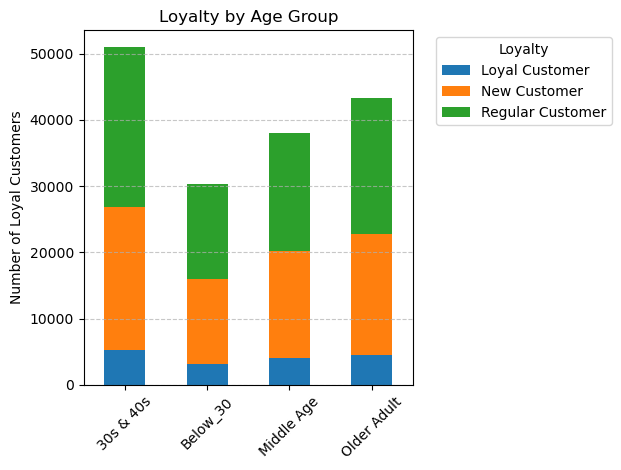

In [163]:
plt.figure(figsize=(8, 10)) 
crosstab_loyal.plot(kind='bar', stacked=True)
plt.title('Loyalty by Age Group')
plt.xlabel('')
plt.ylabel('Number of Loyal Customers')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Loyalty',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','loyalty_by_age.png'),bbox_inches='tight')
plt.show()


### The 30s/40s age group tends to rank the highest in all aspects of customers according to this bar chart:  They make up 1)the most loyal group to Instacart, 2) the most regular customers, and 3) they make up the majority of new customers.

In [165]:
#Analyzing the relationship between types of spenders and age groups
crosstab_spender = pd.crosstab(unique_users['age_flag'],unique_users['spending_flag'], dropna = False)

In [167]:
crosstab_spender

spending_flag,High Spender,Low Spender
age_flag,,
30s & 40s,1188,49793
Below_30,666,29710
Middle Age,892,37132
Older Adult,955,42295


In [170]:
#turn into a percentage
crosstab_spender_normalized = crosstab_spender.div(crosstab_spender.sum(axis=1), axis=0) * 100

In [171]:
crosstab_spender_normalized

spending_flag,High Spender,Low Spender
age_flag,,
30s & 40s,2.330280,97.669720
Below_30,2.192520,97.807480
Middle Age,2.345887,97.654113
Older Adult,2.208092,97.791908


<Figure size 800x1000 with 0 Axes>

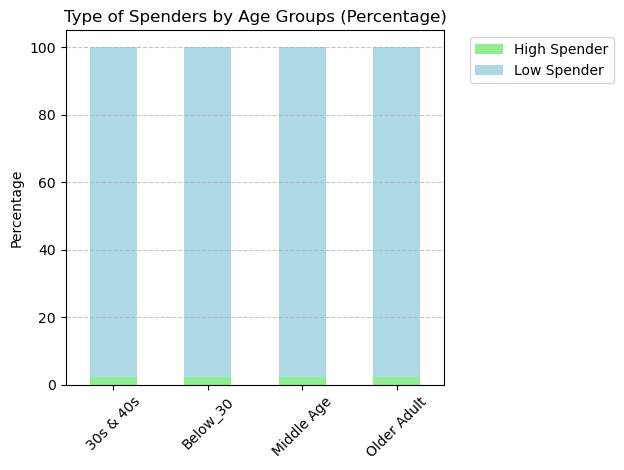

In [172]:
#Visualization
plt.figure(figsize=(8, 10)) 
crosstab_spender_normalized.plot(kind='bar', stacked=True, color=['lightgreen', 'lightblue'])
plt.title('Type of Spenders by Age Groups (Percentage)')
plt.xlabel('')
plt.ylabel('Percentage')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','spenders_by_age.png'),bbox_inches='tight')
plt.show()

#### they all seem to be the same 'type' of spender across all age groups (small portion of high spenders and majority of low) -there is no trend for age in amount spent 


### let's look at the 'shop_time_flag' I created to see their shopping habits

In [175]:
# Check the flag values
df_merged['shop_time_flag'].value_counts(dropna = False)

shop_time_flag
Regular       24908263
Night Owl      3168547
Early Bird     2887754
Name: count, dtype: int64

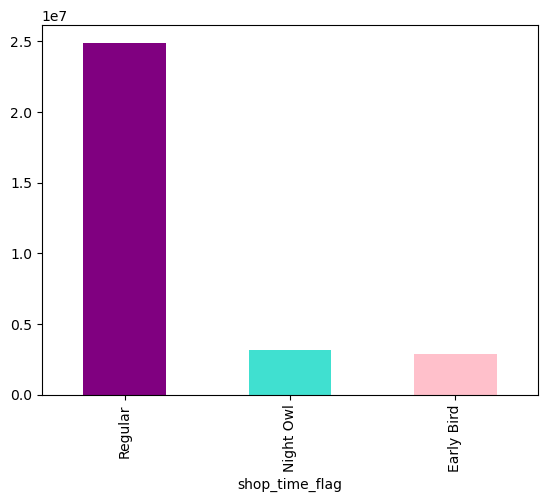

In [186]:
# Create bar graph for shopping behavior'#b03671', '#d576a4','#e8b5ce'
shop_time_bar = df_merged['shop_time_flag'].value_counts().plot.bar(color =['purple', 'turquoise','pink'])
#export bar chart
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','shop_time_bar.png'),bbox_inches='tight')
plt.show()

In [181]:
# Create pie chart for shop times
# Create table of shopping behavior counts
shop_counts = df_merged['shop_time_flag'].value_counts()

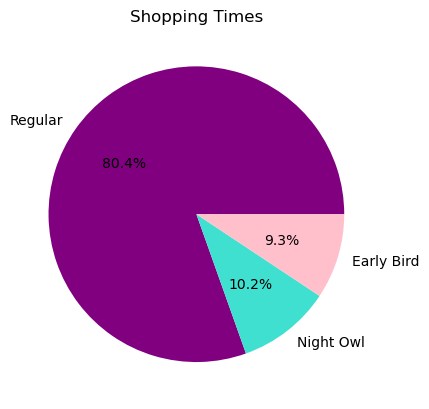

In [189]:
# Create pie chart with labels and color
shop_time_pie = plt.pie(shop_counts,labels = shop_counts.index, autopct='%1.1f%%', colors=['purple', 'turquoise','pink'])
# Add title
plt.title('Shopping Times')
# Save Pie Chart
#export pie
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','shop_time_pie.png'),bbox_inches='tight')
plt.show()

In [204]:
# Create a crosstable with shopping behavior and department id
shop_time_dep_cross = pd.crosstab(df_merged['department'],df_merged['shop_time_flag'], dropna = False)

In [205]:
shop_time_dep_cross 

shop_time_flag,Early Bird,Night Owl,Regular
department,,,
alcohol,7972,8464,128191
babies,50188,50244,309960
bakery,107807,108043,904978
beverages,231045,236691,2104165
breakfast,68714,67979,534157
bulk,3057,3738,26656
canned goods,88259,103969,819846
dairy eggs,515309,526094,4135779
deli,88984,99231,815619


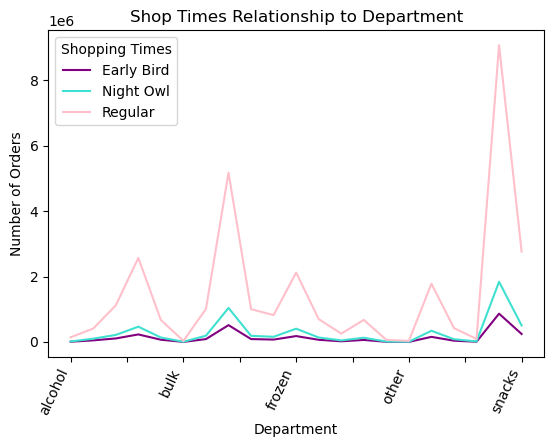

In [211]:
# Create stacked line chart for number of orders per department per shopping times with color
shoptime_dep_line = shop_time_dep_cross.plot(kind = 'line', stacked = True, color = ['purple', 'turquoise','pink'])
# Adjust plot size
plt.subplots_adjust(bottom = 0.2)
# Add axis and title labels
plt.title('Shop Times Relationship to Department')

plt.xlabel('Department')
plt.ylabel('Number of Orders')

# Add x tick mark labels, position adjusted
plt.xticks(rotation = 65, ha = 'right')

# Add legend title
plt.legend(title = 'Shopping Times')
# Save Stacked Line Chart
plt.savefig( 'shop_time_dep_bar.png')



### This shows all shoppers show the same preference patterns as they all buy more snacks, no matter what time of day the order is placed

In [213]:
shoptime_dep_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_shop_time_dep).png'))

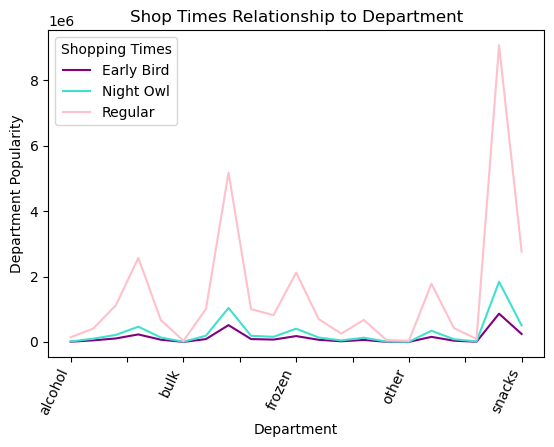

In [256]:
# Create stacked line chart for number of orders per department per shopping times with color
shoptime_dep_line = shop_time_dep_cross.plot(kind = 'line', stacked = True, color = ['purple', 'turquoise','pink'])
# Adjust plot size
plt.subplots_adjust(bottom = 0.2)
# Add axis and title labels
plt.title('Shop Times Relationship to Department')

plt.xlabel('Department')
plt.ylabel('Department Popularity')

# Add x tick mark labels, position adjusted
plt.xticks(rotation = 65, ha = 'right')

# Add legend title
plt.legend(title = 'Shopping Times')







### I wanted to cross check this with my department popularity flag.  Same insights shown here (as expected)

## Export this data frame (contains all new flags and departments merged)

In [215]:
# Exporting the data
df_merged.to_pickle(os.path.join( path, '02 Data', 'Prepared Data', 'instacart_merged_2.pkl'))

## #7) Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [216]:
pd.set_option('display.max_columns', None)

In [217]:
# Calculate the total amount spent by each customer and assign it to a new column 'total_spent'
df_merged['total_spent'] = df_merged.groupby('user_id')['prices'].transform(np.sum)

/var/folders/fb/2jrdrrb52mv7jbhxt0nbx_740000gn/T/ipykernel_1651/681925994.py:2: FutureWarning: The provided callable <function sum at 0x10d8511c0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_merged['total_spent'] = df_merged.groupby('user_id')['prices'].transform(np.sum)


In [218]:
df_merged['total_spent'].describe()

count    3.096456e+07
mean     3.418331e+03
std      2.927679e+03
min      5.000000e+00
25%      1.243800e+03
50%      2.536300e+03
75%      4.776800e+03
max      2.639490e+04
Name: total_spent, dtype: float64

In [219]:
df_merged.groupby('age_flag').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent                max_order        
                   mean   min      max      mean min max
age_flag                                                
30s & 40s       3449.00   7.0  22696.9     34.54   5  99
Below_30        3406.19  10.5  18883.2     34.38   5  99
Middle Age      3418.44   5.0  24307.1     34.43   5  99
Older Adult     3390.44   6.8  26394.9     34.33   5  99

In [221]:
df_merged.groupby('living_flag').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent               max_order        
                   mean  min      max      mean min max
living_flag                                            
Alone           3428.07  5.0  24307.1     34.68   5  99
With Family     3415.08  6.8  26394.9     34.34   5  99

In [222]:
df_merged.groupby('loyalty_flag').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent                 max_order        
                        mean    min      max      mean min max
loyalty_flag                                                  
Loyal Customer       6153.84  156.0  26394.9     63.98  41  99
New Customer          785.45    5.0   3920.4      7.49   5  10
Regular Customer     2443.03   15.7  12186.6     23.43  11  40

In [223]:
df_merged.groupby('frequency_flag').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent                max_order        
                             mean   min      max      mean min max
frequency_flag                                                    
Frequent Customer         4278.22  11.0  26394.9     43.63   5  99
Non-frequent Customer      977.76   6.8   5672.0      9.18   5  25
Regular Customer          1791.52   5.0  10682.7     16.63   5  45

In [224]:
df_merged.groupby('region').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent               max_order        
                 mean  min      max      mean min max
region                                               
Midwest       3358.50  7.0  26394.9     33.93   5  99
Northeast     3438.61  7.7  22777.9     34.60   5  99
South         3424.80  6.8  24307.1     34.48   5  99
West          3450.73  5.0  18910.0     34.68   5  99

In [225]:
df_merged.groupby('busiest_days').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent               max_order        
                       mean  min      max      mean min max
busiest_days                                               
Busiest days        3411.56  5.0  26394.9     33.41   5  99
Least busy days     3429.69  5.0  26394.9     35.87   5  99
Regularly busy      3417.83  5.0  26394.9     34.50   5  99

In [226]:
df_merged.groupby('busiest_period_of_day').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent               max_order        
                             mean  min      max      mean min max
busiest_period_of_day                                            
Average orders            3404.60  5.0  26394.9     34.37   5  99
Fewest orders             3412.34  7.0  26394.9     34.42   5  99
Most orders               3425.20  5.0  26394.9     34.45   5  99

In [227]:
df_merged.groupby('dep_popularity').agg({'total_spent': ['mean', 'min', 'max'], 'max_order': ['mean', 'min', 'max']}).round(2)

total_spent                max_order        
                        mean   min      max      mean min max
dep_popularity                                               
Most Popular         3007.66  44.4  26394.9     31.17   5  99
Not popular          3312.75   5.0  26394.9     33.40   5  99
Regularly bought     3537.12  11.2  26394.9     35.57   5  99
nan                  3043.38  13.7  22777.9     33.46   5  99

## #8) Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.


In [229]:
# Group the data by 'region'
grouped = df_merged.groupby('region')

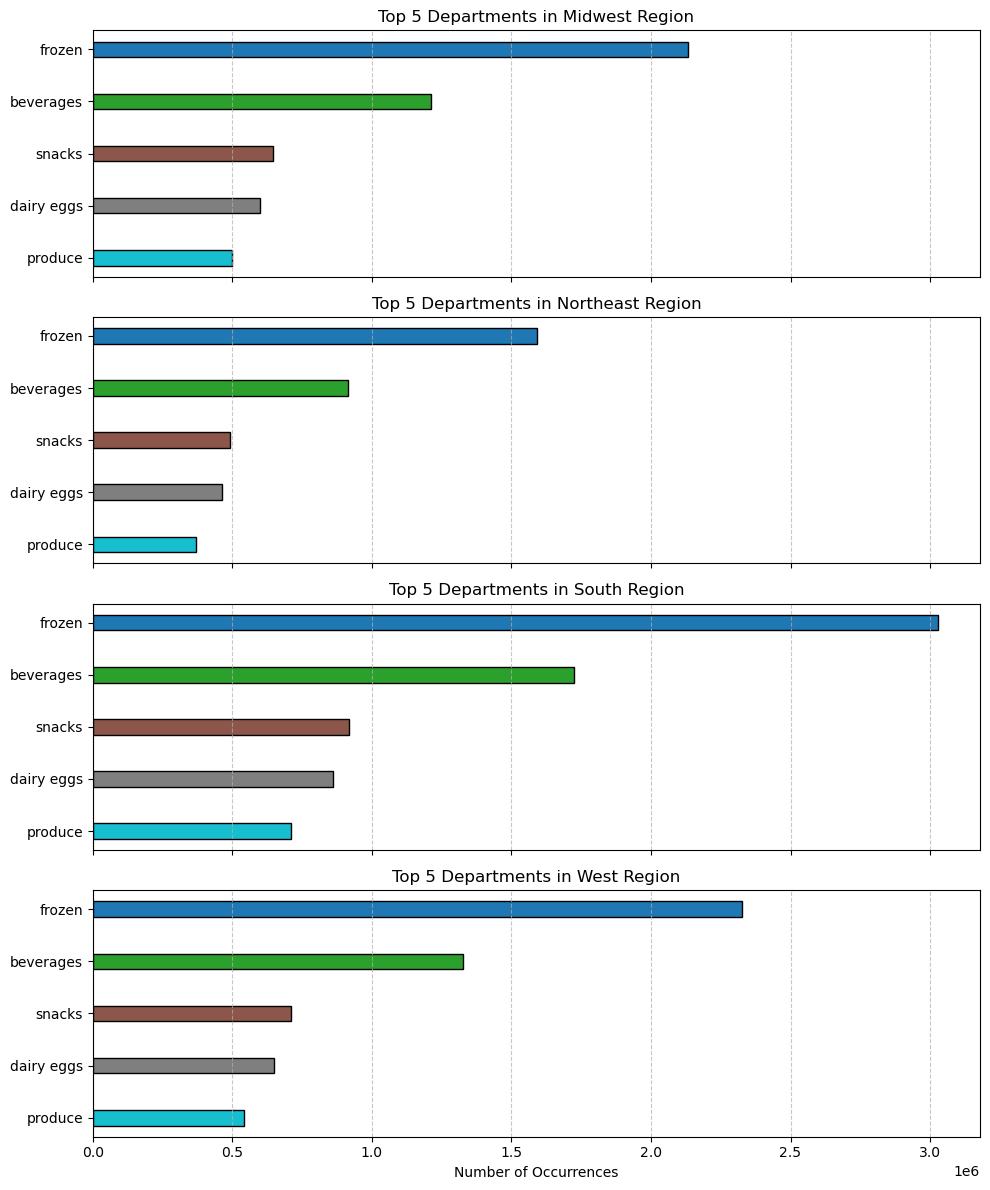

In [230]:
# Define colors for each department
colors = plt.cm.tab10(np.linspace(0, 1, 5))  

# Create subplots for each region
fig, axs = plt.subplots(nrows=len(grouped), ncols=1, figsize=(10, 12), sharex=True)

# Plotting the horizontal bar chart for each region
for i, (region, data) in enumerate(grouped):
    department_counts = data['department'].value_counts().head(5)
    
    axs[i].barh(np.arange(5), department_counts.values, color=colors, edgecolor='black', height=0.3)  
                                                                            # Set height to make bars thinner
    axs[i].set_yticks(np.arange(5))
    axs[i].set_yticklabels(department_counts.index[::-1])  # Reverse the order of departments
    axs[i].set_ylabel('')
    axs[i].set_title(f'Top 5 Departments in {region.capitalize()} Region')
    axs[i].grid(axis='x', linestyle='--', alpha=0.7)
    axs[i].invert_yaxis()  # Invert the y-axis to show the top department first

plt.xlabel('Number of Occurrences')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis','Visualizations','top5_region.png'),bbox_inches='tight')
plt.show()

In [231]:
#Create a random patterns of 4
np.random.seed(4)

In [232]:
dev = np.random.rand(len(df_merged))<= 0.7

In [233]:
#Split in two samples
big = df_merged[dev]
small = df_merged[~dev]

In [234]:
#check the length of the two samples to make sure they equal the whole
len(df_merged)==len(big)+len(small)

True

In [260]:
crosstab_reg_dep = pd.crosstab(unique_users['department'],unique_users['region'], dropna = False)

In [261]:
crosstab_reg_dep

region,Midwest,Northeast,South,West
department,,,,
alcohol,7,4,12,4
babies,0,1,0,0
bakery,4,3,1,3
beverages,33745,25076,47561,36359
breakfast,2,3,4,2
canned goods,0,0,1,0
dairy eggs,4025,3035,5750,4444
deli,2,1,1,2
dry goods pasta,0,0,1,0


<Figure size 800x1000 with 0 Axes>

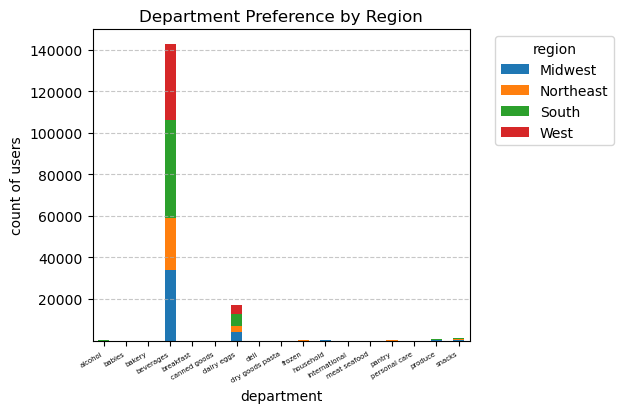

In [267]:
plt.figure(figsize=(8, 10)) 
crosstab_reg_dep.plot(kind='bar', stacked=True)
plt.title('Department Preference by Region')
plt.xlabel('department')
plt.ylabel('count of users')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='region',loc='upper left', bbox_to_anchor=(1.05, 1)) 
plt.tight_layout() 
# Add x tick mark labels, position adjusted
plt.xticks(rotation=30, ha='right', fontsize=5)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_region_dep_pref.png'),bbox_inches='tight')
plt.show()


### This shows that within the departments, all regions prefered beverages department, followed by dairy & eggs department (this doesn't make sense as it doesn't line up with above visualization.  I may have entered values wrong) - I will not use this in my final presentation but decided to keep so I can refer back if I need to.

#note that this dataframe was already exported as 'instacart_merged_2.pkl'